## **Lab 1:** Introduction to Vision: Exploring Images and Building a Simple Vision Pipeline

**Objectives**
- Brief overview of the challenge of computer vision and simple vision systems.
- Loading and Displaying Images.
- Inspecting Pixel Data.
- Image Manipulations.
- Implement a mini “Vision Pipeline”.
- Exercise: Implement an Instagram image filter to transform image into vintage sepia with vignetting.

**Reading**

Book: [Foundations of Computer Vision](https://visionbook.mit.edu/)
- Chapter 1: The Challenge of Vision
- Chapter 2: A Simple Vision System
- Chapter 3: Looking at Images

**Instructions:**
> - Ensure your Python environment is setup correctly, in particular Jupyter package is installed.<br>As we progress through this module, you may be required to install additional packages.
> - Prior to this tutorial, read the entire notebook and attempt all coding exercises.
> - To complete the coding exercises, write some python code between<br>`### INPUT YOUR CODE HERE ###` and `### END OF YOUR CODE SEGMENT ###`.<br> Use provided hints where necessary.
> - Run cells by pressing `Shift+Enter` and verify that your results are consistent with unit tests.
> - Submit completed notebook on VLE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, data, exposure, transform, filters, util, metrics
import cv2
from scipy.signal import convolve2d

print("Library versions:")
print("numpy:", np.__version__)
print("matplotlib:", plt.matplotlib.__version__)
print("cv2:", cv2.__version__)

# TODO: confirm you can run this cell without errors.

Library versions:
numpy: 2.0.2
matplotlib: 3.10.0
cv2: 4.12.0


## <font color='#D85658'>A. Background</font> ##

Brief overview of the challenge of computer vision and simple vision systems

Computer vision aims to enable machines to interpret and understand visual information.  
Unlike humans, who recognize objects effortlessly, vision systems face challenges such as:

- **Illumination changes** (same object looks different under lighting conditions).
- **Viewpoint variation** (object from different angles/scales).
- **Occlusion** (object partially hidden).
- **Intra-class variation** (dogs of different breeds all belong to the class *dog*).
- **Inter-class similarity** (some categories look very similar, e.g., wolf vs. husky).

Before modern deep learning, computer vision relied on *simple vision systems*:
- Edge detection (e.g., Canny, Sobel).
- Template matching.
- Hand-crafted features (SIFT, HOG, SURF).

### Exercise 1:

To understand why computer vision is challenging, we can apply transformations that change how an image looks:  
- **Rotation**: simulates different viewpoints  
- **Scaling (resizing)**: changes the object size  
- **Noise**: simulates sensor imperfections or poor quality

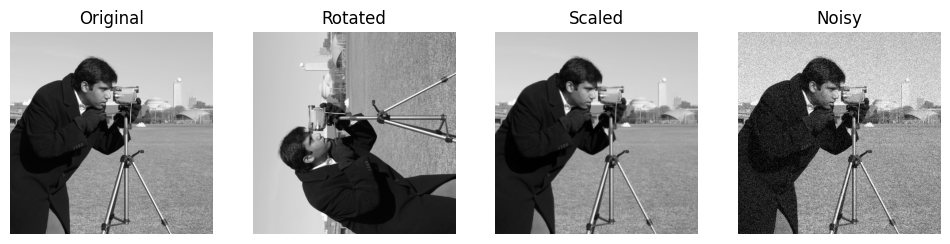

In [ ]:
image = data.camera()

### TODO: Implement this step ###
# Hint: Use appropriate functions from numpy, matplotlib, or OpenCV.

# --- Create variations ---

# rotated
### START CODE ### (1 line)
rotated = transform.rotate(image,90)
### END CODE ###

# rescale
### START CODE ### (1 line)
scaled = transform.rescale(image,0.5)
### END CODE ###

# random_noise
### START CODE ### (1 line)
noisy = util.random_noise(image)
### END CODE ###

# --- Show images ---
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
titles = ['Original', 'Rotated', 'Scaled', 'Noisy']
imgs = [image, rotated, scaled, noisy]

for ax, img, title in zip(axes, imgs, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()

> ***Expected Output:*** 4 Images

### Exercise 2:

**Simple Vision Systems**: Edge Detection

One of the simplest vision techniques is **edge detection**, where we highlight boundaries in an image.  
Edges are places where pixel intensity changes quickly — often corresponding to object outlines or texture.  
Here we use the **Sobel filter** from `skimage.filters` to compute edges.

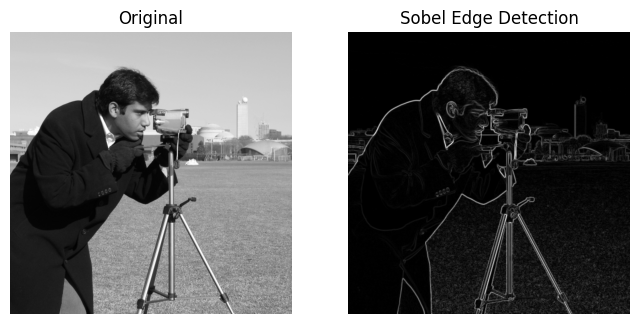

In [ ]:
### TODO: Implement this step ###
# Hint: Use appropriate functions from numpy, matplotlib, or OpenCV.

# Apply Sobel filter to detect edges
### START CODE ### (1 line)
edges = filters.sobel(image)
### END CODE ###

# Plot original image vs. edges
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# Show original
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[0].axis("off")

# Show detected edges
ax[1].imshow(edges, cmap='gray')
ax[1].set_title("Sobel Edge Detection")
ax[1].axis("off")

plt.show()

> ***Expected Output:*** 2 Images

### Exercise 3:

Template Matching

Template matching is a classical computer vision technique where a **small patch (template)** is slid over an image to find the best matching location.  
It works well when the object appears exactly as in the template, but struggles with scale, rotation, or noise.

In [ ]:
from skimage.feature import match_template
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Extract a template (a patch of the original image) ---
# Here we take a region around the eye as our template
template = image[180:220, 210:250]

# --- Step 2: Perform template matching ---
# The function slides the template across the image and returns similarity scores
### START CODE ### (1 line)
result = match_template(image,template)
### END CODE ###

# --- Step 3: Find the best match location (highest similarity score) ---
### START CODE ### (2 lines)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij
### END CODE ###

# --- Step 4: Visualize the process ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Show the template (eye patch)
ax1.imshow(template, cmap='gray')
ax1.set_title("Template (Eye)")
ax1.axis("off")

# Show the similarity map (high values = good match)
ax2.imshow(result, cmap='viridis')
ax2.set_title("Match Result")
ax2.axis("off")

# Show the best match location on the original image
ax3.imshow(image, cmap='gray')
ax3.plot(y, x, 'ro')  # red dot marks best match
ax3.set_title("Best Match Location")
ax3.axis("off")

plt.show()

> ***Expected Output:*** 3 Images

## <font color='#D85658'>B. Loading and Displaying Images</font> ##

Before applying transformations, it’s important to **load an image** and check its properties.  
We’ll use the `astronaut` sample from `skimage.data` and print details such as shape, data type, and intensity range.

### Exercise 1:

In [ ]:
# --- Load example image from scikit-image's built-in dataset ---
img = data.astronaut()

# --- Display the image ---
plt.imshow(img)
plt.title("Original Astronaut Image")
plt.axis("off")
plt.show()

# --- Define a helper function to describe basic image properties ---
def describe(img):
    return {
        ### TODO: Implement this step ###
        # Hint: Use appropriate functions from numpy, matplotlib, or OpenCV.
        ### START CODE ### (3 lines)
        "shape": img.shape, # dimensions: (rows, cols, channels)
        "dtype": img.dtype, # data type (e.g., uint8, float32)
        "range": [float(np.min(image)),float(np.max(image))]  # min/max intensity values
        ### END CODE ###
    }

# --- Print the image description ---
print(describe(img))

> ***Expected Output:*** 1 Image, 3 Attributes

## <font color='#D85658'>C. Inspecting Pixel Data</font> ##

Digital images are stored as arrays of pixel values.  
It is often useful to inspect an image’s **shape**, **data type**, and **intensity range** before applying any processing steps.  
This helps us understand the image representation and avoid errors later.

### Exercise 1:

Most images are stored in the **RGB color space** (Red, Green, Blue channels).  
Sometimes we convert them into **grayscale** (single intensity channel), especially when color is not important for the task.  
Here we compare the original RGB image with its grayscale version and implement our own `rgb_to_gray` conversion using standard luminance weights.

In [ ]:
from skimage import color
import matplotlib.pyplot as plt
import numpy as np

# --- Convert the image to grayscale using skimage ---
### TODO: Implement this step ###
### START CODE ### (1 line)
img_gray = color.rgb2gray(img)
### END CODE ###

# --- Display the original (RGB) and grayscale versions side by side ---
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img)
ax[0].set_title("RGB")
ax[0].axis("off")

ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title("Grayscale")
ax[1].axis("off")

plt.show()

# --- Define a manual RGB → Grayscale conversion ---
def rgb_to_gray(input_img):
    # Check that the image has 3 channels
    assert input_img.shape[2] == 3, "The input image must have 3 channels"

    # Split into R, G, B channels
    ### TODO: Implement this step ###
    ### START CODE ### (1 line)
    r, g, b = input_img[:,:,0],input_img[:,:,1],input_img[:,:,2]
    ### END CODE ###

    # Weighted sum according to luminance perception
    ### TODO: Implement this step ###
    ### START CODE ### (1 line)
    weighted_sum = 0.299*r + 0.587*g + 0.114*b
    ### END CODE ###

    return weighted_sum

# --- Compare the manual conversion with skimage's version ---
difference = np.abs(rgb_to_gray(img) / 255.0 - color.rgb2gray(img)).mean()
print("Gray difference:", difference)


> ***Expected Output:*** 2 Images, 1 Number

### Exercise 2:

Digital images are represented as discrete samples (pixels) with discrete intensity values.  

- **Sampling** controls the *spatial resolution* (number of pixels).  
- **Quantization** controls the *intensity resolution* (number of values per pixel).

In [ ]:
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np

# --- Downsample the image to 25% of its original size ---
img_small = transform.rescale(img, 0.25, channel_axis=-1, anti_aliasing=True)

# --- Define a quantization function ---
def quantize(input_img, bits):
    assert input_img.shape[2] == 3, "The input image must have 3 channels"

    # Normalize pixel values to [0, 1]
    ### TODO: Implement this step ###
    ### START CODE ### (1 line)
    img_f = input_img/255.0
    ### END CODE ###

    # Number of intensity levels given the bit depth
    levels = 2**bits

    # Quantize by mapping values into discrete bins
    ### TODO: Implement this step ###
    ### START CODE ### (1 line)
    q = np.floor(img_f * levels) / (levels - 1)
    ### END CODE ###

    # Scale back to [0, 255] and convert to uint8
    ### TODO: Implement this step ###
    ### START CODE ### (1 line)
    out_img = (q * 255).astype(np.uint8)
    ### END CODE ###

    return out_img

# --- Visualize sampling and quantization effects ---
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Show rescaled (downsampled) image
ax[0].imshow(img_small)
ax[0].set_title("Rescaled (25%)")
ax[0].axis("off")

# Show quantized image (3 bits per channel)
ax[1].imshow(quantize(img, 3))
ax[1].set_title("Quantized (3 bits per channel)")
ax[1].axis("off")

plt.show()

> ***Expected Output:*** 2 Images

### Exercise 3:

A **point operation** modifies pixel values independently (e.g., brightness adjustment, contrast stretching).  
Histograms help us understand the distribution of pixel intensities across channels.  
Here we visualize the **RGB histograms** of the astronaut image to see how pixel values are spread.

In [ ]:
import matplotlib.pyplot as plt

# --- Create figure with two subplots: original image + histogram ---
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# --- Show original image ---
ax[0].imshow(img)
ax[0].axis("off")
ax[0].set_title("Original")

# --- Plot RGB histograms ---
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    # Flatten the channel (ravel) and plot histogram
    ### TODO: Implement this step ###
    ### START CODE ### (1 line)
    ax[1].hist(img[:,:,i].ravel(),bins=256,color=color,alpha=0.5,label=color)
    ### END CODE ###

ax[1].set_title("Histogram of RGB Intensities")
ax[1].legend()

plt.show()

> ***Expected Output:*** 1 Image, 1 Figure

### Exercise 4:

Gamma correction is a nonlinear **point operation** used to adjust image brightness.  
It is especially important because display devices (monitors, cameras) often apply gamma encoding.  
Here we implement a gamma correction function and apply it with $\gamma = 2.2$, which darkens the mid-tones.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Define a gamma correction function ---
def gamma_correct(input_img, gamma):
    assert input_img.shape[2] == 3, "The input image must have 3 channels"

    # Normalize pixel values to [0, 1]
    ### TODO: Implement this step ###
    ### START CODE ### (1 line)
    img_f = input_img/255.0
    ### END CODE ###

    # Apply gamma correction: output = input^(1/gamma)
    ### TODO: Implement this step ###
    ### START CODE ### (1 line)
    corrected = np.power(img_f, 1.0 / gamma)
    ### END CODE ###

    # Scale back to [0, 255] and convert to uint8
    ### TODO: Implement this step ###
    ### START CODE ### (1 line)
    out_img = (corrected * 255).astype(np.uint8)
    ### END CODE ###

    return out_img

# --- Apply gamma correction with γ = 2.2 ---
plt.imshow(gamma_correct(img, 2.2))
plt.title("Gamma 2.2")
plt.axis("off")
plt.show()


> ***Expected Output:*** 1 Image

## <font color='#D85658'>D. Image Manipulations</font> ##

Grayscale conversion, contrast enhancement, cropping, resizing. Visualising the impact of transformations.

### Exercise 1:

Many vision tasks do not require color information.  
Converting an image from **RGB (3 channels)** to **grayscale (1 channel)** simplifies computations while preserving structural details like edges and textures.  
Here we compare the original image with its grayscale version.

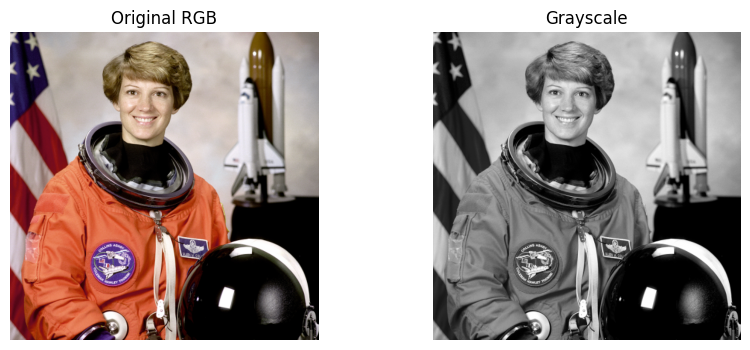

In [ ]:
from skimage import color

# --- Convert the RGB image to grayscale ---
### TODO: Implement this step ###
### START CODE ### (1 line)
gray_image = color.rgb2gray(img)
### END CODE ###

# --- Display the original RGB and grayscale images side by side ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(img)                   # show original color image
axes[0].set_title("Original RGB")
axes[0].axis("off")

axes[1].imshow(gray_image, cmap="gray")  # show grayscale image
axes[1].set_title("Grayscale")
axes[1].axis("off")

plt.show()


> ***Expected Output:*** 2 Images

### Exercise 2:

Histogram equalization is a technique to improve image **contrast**.  
It redistributes pixel intensities so that they cover the full available range more evenly.  
This can make details more visible, especially in low-contrast images.  
Here we apply histogram equalization to a grayscale image and compare both the image and its pixel distributions.

In [ ]:
# --- Apply histogram equalization to the grayscale image ---
### TODO: Implement this step ### (1 line)
equalized = exposure.equalize_hist(gray_image)
### START CODE ###

# --- Create subplots: original, equalized, and histograms ---
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Show original grayscale image
axes[0].imshow(gray_image, cmap="gray")
axes[0].set_title("Original Grayscale")
axes[0].axis("off")

# Show equalized grayscale image
axes[1].imshow(equalized, cmap="gray")
axes[1].set_title("Histogram Equalization")
axes[1].axis("off")

# Plot histograms of pixel intensities before and after equalization
axes[2].hist(gray_image.ravel(), bins=256, color='gray', alpha=0.6, label="Original")
### TODO: Implement this step ###
### START CODE ### (1 line)
axes[2].hist(equalized.ravel(), bins=256, color='pink', alpha=0.6, label="Equalised")
### END CODE ###

axes[2].set_title("Pixel Intensity Distribution")
axes[2].legend()

plt.show()

> ***Expected Output:*** 2 Images, 1 Figure

### Exercise 3:

Cropping is a basic image manipulation used to **focus on a specific area** of interest.  
This can reduce irrelevant background, simplify processing, and improve performance for downstream tasks.  
Here we crop a region containing the astronaut's face.

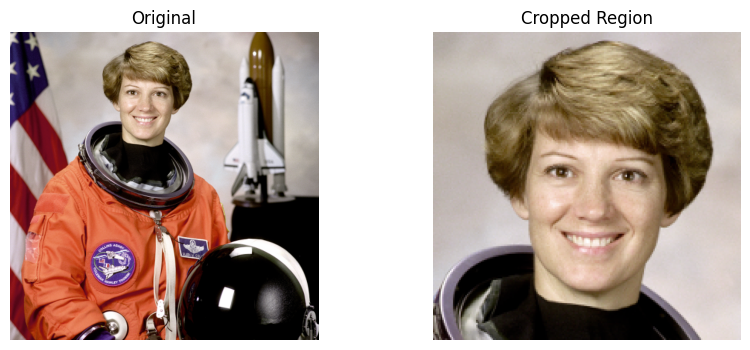

In [ ]:
import matplotlib.pyplot as plt

# --- Crop a region of interest from the original image ---
# Here we select rows 10 to 210 and columns 120 to 320
### TODO: Implement this step ###
### START CODE ### (1 line)
crop = img[10:210,120:320]
### END CODE ###

# --- Display the original image and the cropped region side by side ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(img)              # show original image
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(crop)             # show cropped image
axes[1].set_title("Cropped Region")
axes[1].axis("off")

plt.show()

> ***Expected Output:*** 2 Images

### Exercise 4:

Resizing adjusts the **spatial resolution** of an image.  
- **Downsampling** reduces image size, which can save computation but may lose details.  
- **Upsampling** increases image size, which can introduce blurring or pixelation.  
Here we resize a cropped region to a smaller and a larger size to visualize these effects.

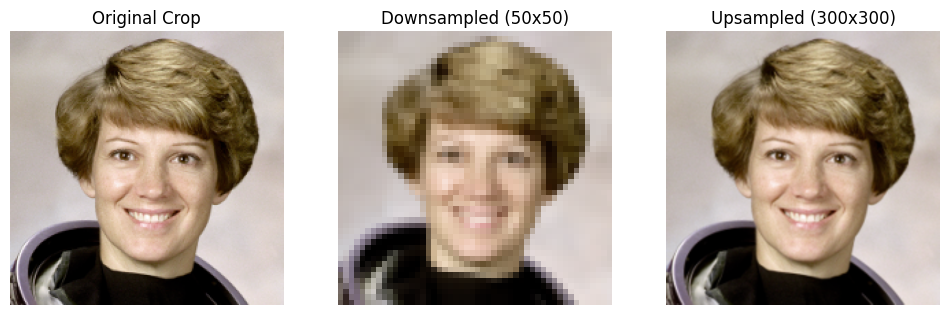

In [ ]:
### TODO: Implement this step ###
# Hint: Use appropriate functions from numpy, matplotlib, or OpenCV.

# Downsample to 50x50 pixels
### TODO: Implement this step ###
### START CODE ### (1 line)
resized_small = transform.resize(crop,(50,50))
### END CODE ###

# Upsample to 300x300 pixels
### TODO: Implement this step ###
### START CODE ### (1 line)
resized_large = transform.resize(crop,(300,300))
### END CODE ###


# --- Display original crop and resized versions side by side ---
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(crop)                 # original crop
axes[0].set_title("Original Crop")
axes[0].axis("off")

axes[1].imshow(resized_small)        # downsampled version
axes[1].set_title("Downsampled (50x50)")
axes[1].axis("off")

axes[2].imshow(resized_large)        # upsampled version
axes[2].set_title("Upsampled (300x300)")
axes[2].axis("off")

plt.show()

> ***Expected Output:*** 3 Images

## <font color='#D85658'>E. Mini "Vision Pipeline"</font> ##

In many computer vision tasks, images are processed through a **sequence of steps** called a pipeline.  
Here we demonstrate a **mini pipeline** that performs:  
1. Cropping a region of interest (ROI)  
2. Converting to grayscale  
3. Enhancing contrast with histogram equalization  
4. Resizing to a standard size  

This illustrates how preprocessing steps can be chained to prepare images for analysis or modeling.

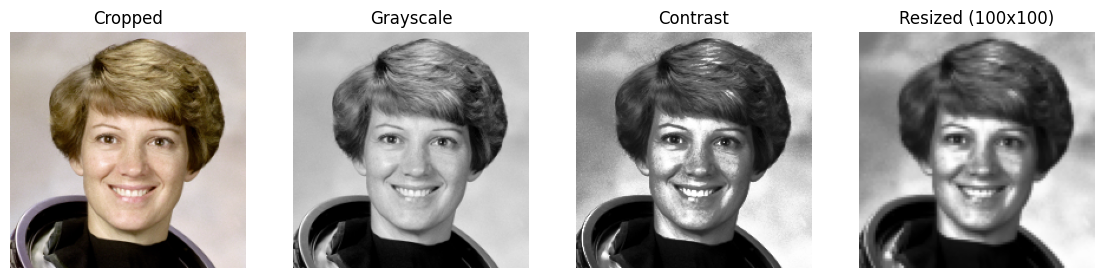

In [ ]:
def vision_pipeline(input_img, crop_coords=(10,210,120,320), resize_shape=(100,100)):
    """
    Mini vision pipeline: crop -> grayscale -> contrast -> resize
    """
    assert input_img.shape[2] == 3, "The input image must have 3 channels"

    ### TODO: Implement this step ###
    # Hint: Use appropriate functions from numpy, matplotlib, or OpenCV.
    ### START CODE ### (4 lines)

    # --- Crop the region of interest ---
    img_crop = input_img[crop_coords[0]:crop_coords[1],crop_coords[2]:crop_coords[3]]

    # --- Convert cropped image to grayscale ---
    img_gray = color.rgb2gray(img_crop)

    # --- Enhance contrast using histogram equalization ---
    img_contrast = exposure.equalize_hist(img_gray)

    # --- Resize the image to a standard size ---
    img_resized = transform.resize(img_contrast,resize_shape)

    ### START CODE ###

    return img_crop, img_gray, img_contrast, img_resized

# --- Apply the pipeline to the image ---
crop, gray, contrast, resized = vision_pipeline(img)

# --- Visualize each stage of the pipeline ---
fig, axes = plt.subplots(1, 4, figsize=(14, 4))
titles = ["Cropped", "Grayscale", "Contrast", "Resized (100x100)"]

for ax, out_img, title in zip(axes, [crop, gray, contrast, resized], titles):
    ax.imshow(out_img, cmap="gray" if out_img.ndim == 2 else None)
    ax.set_title(title)
    ax.axis("off")

plt.show()

> ***Expected Output:*** 4 Images

## <font color='#D85658'>F. Exercise 1</font> ##

Implement an Instagram image filter to transform image into vintage sepia with vignetting. Instagram-style filters often combine multiple simple transformations to create a "mood" or style. Here we implement a **vintage filter** that applies:  
1. **Sepia toning** to give a warm, old-photograph effect  
2. **Vignette** to darken edges and focus attention on the center  

This demonstrates how chaining manipulations can produce creative visual effects.


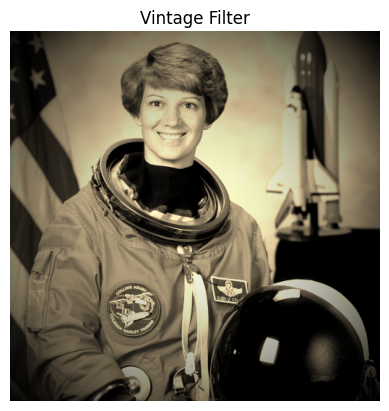

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Define the vintage filter function ---
def vintage_filter(input_img):
    assert input_img.shape[2] == 3, "The input image must have 3 channels"

    # Convert image to float for accurate computation
    img_f = input_img.astype(np.float32) / 255.0

    # Sepia filter matrix
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])

    # Apply the sepia filter (matrix multiplication for RGB channels)
    ### START CODE ### (2 line)
    sepia = img_f @ sepia_filter.T
    ### END CODE ###
    sepia = np.clip(sepia, 0, 1)

    # --- Create a vignette mask ---
    rows, cols = sepia.shape[:2]

    # Create coordinate grids:
    # y is a column vector of row indices, x is a row vector of column indices
    y, x = np.ogrid[0:rows, 0:cols]

    # Define the center of the image (row midpoint, col midpoint)
    ### START CODE ### (1 line)
    center = (rows / 2, cols / 2)
    ### END CODE ###

    # Compute the Euclidean distance of each pixel from the center
    ### START CODE ### (1 line)
    dist = np.sqrt((x - center[1])**2 + (y - center[0])**2)
    ### END CODE ###

    # Normalize distances to [0, 1] by dividing by the maximum distance (corner pixels)
    mask = dist / dist.max()

    ### START CODE ### (1 line)
    vignette = 1 - mask**2  # stronger darkening toward edges
    ### END CODE ###
    vignette = np.clip(vignette, 0, 1)

    # Apply vignette to sepia image
    ### START CODE ### (1 line)
    sepia_vignette = sepia * vignette[..., np.newaxis]
    ### END CODE ###

    # Convert back to 8-bit image
    return (sepia_vignette * 255).astype(np.uint8)

# --- Apply the vintage filter and display ---
plt.imshow(vintage_filter(img))
plt.title("Vintage Filter")
plt.axis("off")
plt.show()

> ***Expected Output:*** 1 Image

## <font color='#D85658'>G. Exercise 2</font> ##

Implement an Instagram image filter to transform image into Cool Blue Film style. Another popular Instagram-style effect is a **cool-toned cinematic look**.  

This filter combines:  
1. **Color shift** to reduce reds and enhance blues  
2. **Brightness/contrast adjustment** to improve overall tone  
3. **Soft Gaussian blur** to give a dreamy, cinematic feel  

It demonstrates how chaining multiple simple manipulations can create a visually appealing style.


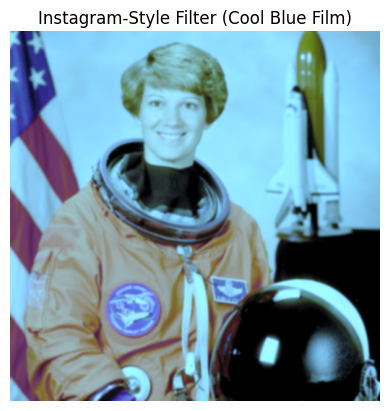

In [ ]:
import numpy as np
from skimage import exposure, img_as_float, filters
import matplotlib.pyplot as plt

# --- Define the Cool Blue Film filter function ---
def cool_blue_filter(input_img):
    assert input_img.shape[2] == 3, "The input image must have 3 channels"

    # Convert image to float in [0, 1] range for accurate computation
    f_img = img_as_float(input_img)

    # --- Step 1: Cool color shift ---
    cool = f_img.copy()

    ### START CODE ### (2 lines)
    cool[..., 0] = cool[..., 0] * 0.4  # reduce red
    cool[..., 2] = cool[..., 2]* 1.5  # boost blue
    ### END CODE ###

    # --- Step 2: Brightness/contrast adjustment ---
    ### START CODE ### (1 line)
    bright = exposure.adjust_gamma(cool, gamma=0.5)
    ### END CODE ###

    # --- Step 3: Apply soft Gaussian blur for dreamy effect ---
    ### START CODE ### (1 line)
    blurred = filters.gaussian(bright, sigma=1.2, channel_axis=-1)
    ### END CODE ###

    return blurred

# --- Apply the filter ---
filtered_cool = cool_blue_filter(img)

# --- Display the filtered image ---
plt.imshow(filtered_cool)
plt.title("Instagram-Style Filter (Cool Blue Film)")
plt.axis("off")
plt.show()

> ***Expected Output:*** 1 Image

## <font color='#D85658'>H. Reflection Questions</font> ##

* <u>How does preprocessing affect downstream tasks?</u>

Ans: Preprocessing improves downstream tasks by cleaning and standardizing the input before it reaches the model. Techniques like noise removal and normalization reduce irrelevant variation, while resizing ensures consistent input size. Contrast enhancement (e.g., histogram equalization) highlights important features such as edges and textures, and converting to grayscale simplifies the problem when color is not essential. Overall, effective preprocessing makes inputs cleaner and more consistent, which leads to better accuracy, stability, and generalization in classification, detection, and recognition tasks.

* <u>When might simple transformations suffice versus needing more complex models?</u>

Ans: Simple transformations (like rotation, scaling ) often suffice when the task is basic, the data is clean, and patterns are visually distinct. For example, separating dark text from a light background or detecting simple shapes. However, more complex models (like deep neural networks) are needed when the data is noisy, features are subtle, or tasks require understanding high-level abstractions. Such as object recognition in varied lighting, facial recognition.

* <u>How do preprocessing choices differ between traditional computer vision pipelines and deep learning pipelines?</u>

Ans: In traditional computer vision pipelines, preprocessing is often heavy and hand-crafted: resizing, denoising, edge detection, histogram equalization, or feature extraction. The goal is to make features explicit before passing them to a classifier.  

In deep learning pipelines, preprocessing is usually lighter and more standardized like resizing to a fixed input size, normalization, and sometimes simple augmentations (flips, rotations, color changes). The network learns features directly from raw data, so less manual engineering is needed.

* <u>How does resizing impact both computational efficiency and model accuracy?</u>

Ans: Smaller images reduce the number of pixels, which lowers memory use and speeds up computation — useful for real-time systems or limited hardware. However, shrinking too much can remove important details, hurting accuracy. Larger images preserve more fine-grained features, which can improve accuracy, but at the cost of slower training/inference and higher resource demand.The key is the balance. Resize enough to fit hardware and speed requirements, but not so much that critical visual information is lost in the process.


